In [1]:
!pip install yfinance

In [2]:
#Importar librerías
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings('ignore')

from deap import base, creator, tools, algorithms


In [3]:
tickers = ['META', 'GE', 'BABA', 'SU', 'F', 'AAPL', 'ABNB', 'GOOG', 'NVDA', 'BBBY']
datos = pd.DataFrame()

for t in tickers:
    datos[t] = yf.download(t, start = '2022-01-01')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
datos

,META,GE,BABA,SU,F,AAPL,ABNB,GOOG,NVDA,BBBY
Date,,,,,,,,,,
2022-01-03,338.540009,74.737373,120.379997,24.350811,19.587744,180.434296,172.679993,145.074493,300.877502,15.1600
2022-01-04,336.529999,77.168068,119.559998,24.710861,21.873131,178.144287,170.800003,144.416504,292.576660,14.9900
2022-01-05,324.170013,77.168068,121.160004,24.786661,21.288288,173.405685,162.250000,137.653503,275.735291,13.3650
2022-01-06,332.459991,77.618469,126.629997,25.184612,22.008093,170.510956,159.750000,137.550995,281.468933,14.4300
2022-01-07,331.790009,78.744507,129.809998,25.165661,21.990099,170.679504,166.050003,137.004501,272.169250,13.8000
...,...,...,...,...,...,...,...,...,...,...
2023-05-22,248.320007,104.550003,86.099998,28.830000,11.630000,174.199997,109.930000,125.870003,311.760010,0.2090
2023-05-23,246.740005,101.699997,82.879997,29.129999,11.730000,171.559998,106.250000,123.290001,306.880005,0.2411
2023-05-24,249.210007,100.980003,81.209999,28.910000,11.330000,171.839996,105.709999,121.639999,305.380005,0.2589


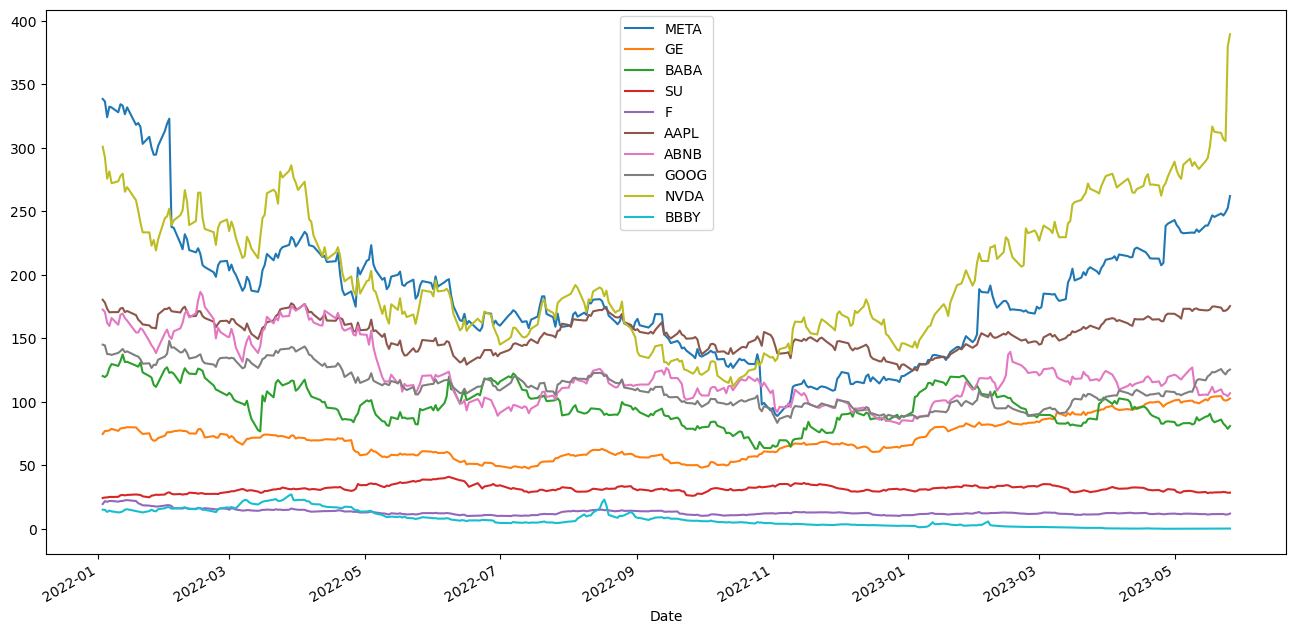

In [5]:
datos.plot(figsize = (16, 8))
plt.show()

In [6]:
datos[338:]

,META,GE,BABA,SU,F,AAPL,ABNB,GOOG,NVDA,BBBY
Date,,,,,,,,,,
2023-05-09,233.369995,101.000000,82.220001,29.660000,11.86,171.532745,127.070000,107.940002,285.709991,0.18800
2023-05-10,233.080002,99.540001,82.949997,29.299999,11.89,173.320267,113.190002,112.279999,288.850006,0.18500
2023-05-11,235.789993,99.510002,87.889999,28.830000,11.87,173.510010,111.199997,116.900002,285.779999,0.18990
2023-05-12,233.809998,98.800003,85.339996,28.680000,11.67,172.570007,105.275002,117.919998,283.399994,0.16490
2023-05-15,238.860001,102.000000,88.339996,29.070000,11.64,172.070007,105.779999,116.959999,289.529999,0.17505
2023-05-16,238.820007,101.129997,88.760002,28.150000,11.25,172.070007,105.410004,120.089996,292.130005,0.17180
2023-05-17,242.490005,103.470001,90.680000,28.629999,11.50,172.690002,108.330002,121.480003,301.779999,0.18380
2023-05-18,246.850006,104.010002,85.769997,28.510000,11.64,175.050003,111.870003,123.519997,316.779999,0.18060
2023-05-19,245.639999,104.260002,83.980003,28.730000,11.65,175.160004,107.379997,123.250000,312.640015,0.17700


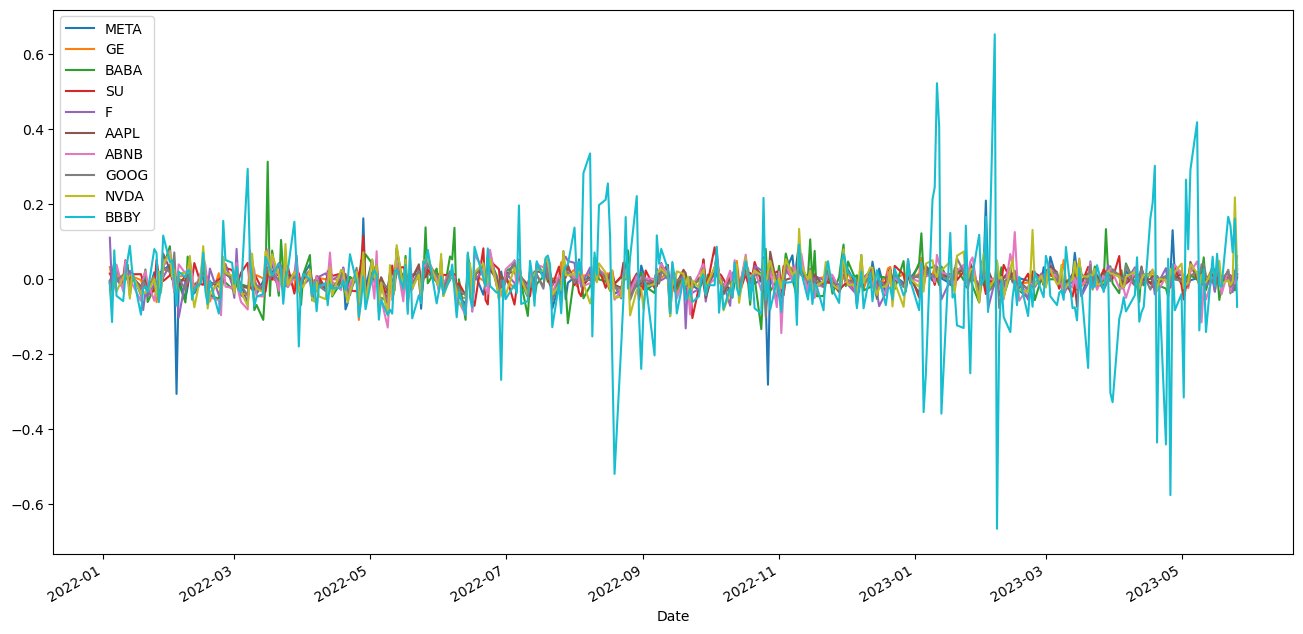

In [7]:
retornoLogaritmico = np.log(datos/datos.shift(1))
retornoLogaritmico.plot(figsize = (16, 8))
plt.show()

In [8]:
retornoLogaritmico.std() * 100

META     3.976439
GE       2.075303
BABA     4.156549
SU       2.573296
F        2.908731
AAPL     2.049348
ABNB     3.666896
GOOG     2.393300
NVDA     3.914214
BBBY    12.729017
dtype: float64

In [9]:
datos[343:]

,META,GE,BABA,SU,F,AAPL,ABNB,GOOG,NVDA,BBBY
Date,,,,,,,,,,
2023-05-16,238.820007,101.129997,88.760002,28.150000,11.25,172.070007,105.410004,120.089996,292.130005,0.1718
2023-05-17,242.490005,103.470001,90.680000,28.629999,11.50,172.690002,108.330002,121.480003,301.779999,0.1838
2023-05-18,246.850006,104.010002,85.769997,28.510000,11.64,175.050003,111.870003,123.519997,316.779999,0.1806
2023-05-19,245.639999,104.260002,83.980003,28.730000,11.65,175.160004,107.379997,123.250000,312.640015,0.1770
2023-05-22,248.320007,104.550003,86.099998,28.830000,11.63,174.199997,109.930000,125.870003,311.760010,0.2090
2023-05-23,246.740005,101.699997,82.879997,29.129999,11.73,171.559998,106.250000,123.290001,306.880005,0.2411
2023-05-24,249.210007,100.980003,81.209999,28.910000,11.33,171.839996,105.709999,121.639999,305.380005,0.2589
2023-05-25,252.690002,101.519997,78.779999,28.450001,11.38,172.990005,104.419998,124.349998,379.799988,0.3042
2023-05-26,262.040009,102.739998,80.970001,28.540001,12.09,175.429993,106.809998,125.430000,389.459991,0.2825


In [10]:
#Definir los valores de los activos para el Algoritmo Genético
capacidad = 1500
precio = np.array(datos[343:]).reshape(-1)
print('Precio de activos: ', precio)
volatilidad = np.array(retornoLogaritmico[343:]).reshape(-1)
print('Volatilidad de los activos: ', volatilidad)
cantidad = np.array([50, 70, 100, 20, 15, 200, 350, 800, 20, 500])
print('Cantidad de acciones: ', cantidad)
utilidad = (precio * cantidad) - (precio * cantidad * volatilidad)
print('Utilidad de cada grupo de acciones es: ', utilidad)

Precio de activos:  [2.38820007e+02 1.01129997e+02 8.87600021e+01 2.81499996e+01
 1.12500000e+01 1.72070007e+02 1.05410004e+02 1.20089996e+02
 2.92130005e+02 1.71800002e-01 2.42490005e+02 1.03470001e+02
 9.06800003e+01 2.86299992e+01 1.15000000e+01 1.72690002e+02
 1.08330002e+02 1.21480003e+02 3.01779999e+02 1.83799997e-01
 2.46850006e+02 1.04010002e+02 8.57699966e+01 2.85100002e+01
 1.16400003e+01 1.75050003e+02 1.11870003e+02 1.23519997e+02
 3.16779999e+02 1.80600002e-01 2.45639999e+02 1.04260002e+02
 8.39800034e+01 2.87299995e+01 1.16499996e+01 1.75160004e+02
 1.07379997e+02 1.23250000e+02 3.12640015e+02 1.77000001e-01
 2.48320007e+02 1.04550003e+02 8.60999985e+01 2.88299999e+01
 1.16300001e+01 1.74199997e+02 1.09930000e+02 1.25870003e+02
 3.11760010e+02 2.09000006e-01 2.46740005e+02 1.01699997e+02
 8.28799973e+01 2.91299992e+01 1.17299995e+01 1.71559998e+02
 1.06250000e+02 1.23290001e+02 3.06880005e+02 2.41099998e-01
 2.49210007e+02 1.00980003e+02 8.12099991e+01 2.89099998e+01
 1.1

ValueError: operands could not be broadcast together with shapes (90,) (10,) 

In [ ]:
#Declarar los contenedores para los operadores genéticos
toolbox = base.Toolbox()
creator.create('FitnessMax', base.Fitness, weights = (1.0,))
creator.create('Individual', list, fitness = creator.FitnessMax)
toolbox.register('attribute', random.randint, 0, 1)
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attribute, n = 10)
toolbox.register('population',tools.initRepeat, list, toolbox.individual)

In [ ]:
#Generamos una población y un individuo
ind = toolbox.individual()
print(ind)
pop = toolbox.population(n = 10)
print(pop)

In [ ]:
#Creamos la función de adaptabilidad
def evaluarAdaptabilidad(individuo):
    util = 0.0
    vol = 0.0
    cant = 0.0
    
    util = np.dot(individuo, utilidad)
    vol = np.dot(individuo, volatilidad)
    cant = np.dot(individuo, cantidad)
    
    if cant > capacidad:
        util = util * (1 - vol)
    else:
        util
    return util,

In [ ]:
#Validad el funcionamiento de la función de adaptabilidad
ind = toolbox.individual()
print(ind)
print(ind.fitness.valid)
ind.fitness.values = evaluarAdaptabilidad(ind)
print(ind.fitness.valid)
print(ind.fitness)

In [ ]:
#Operadores genéticos
toolbox.register('select', tools.selTournament, tournsize = 3)
toolbox.register('mate', tools.cxOnePoint)
toolbox.register('mutate', tools.mutFlipBit, indpb = 0.3)
toolbox.register('evaluate', evaluarAdaptabilidad)

In [ ]:
#Configuración de estadísticas
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register('promedio', np.mean)
stats.register('desviación', np.std)
stats.register('mínimo', np.min)
stats.register('máximo', np.max)

In [ ]:
#Algortimo Genético
population = toolbox.population(n = 250)
population, logbook = algorithms.eaSimple(population, toolbox,
                                         cxpb = 0.5, mutpb = 0.3, ngen = 50,
                                         verbose = False, stats = stats)
print('El resultado de la evolución es: ')
print(logbook)
print('La mejor solución es: ')
print(tools.selBest(population, 1)[0])

In [ ]:
gen = logbook.select('gen')
avgs = logbook.select('promedio')
fig = plt.figure()
ax1 = plt.gca()
line1 = ax1.plot(gen, avgs, 'r-', label = 'Adaptabilidad promedio')
ax1.set_xlabel('Generaciones')
ax1.set_ylabel('Adaptabilidad')
plt.show()